### Answers to Assignment 7 - Plotting

Complete the tasks below. Please turn in a single Jupyter notebook named `7_first_last.ipynb` (substitute your first and last name). Please run Kernel > Restart & Run All on your notebook before turning in.

#### Moons of the Solar System

For this assignment, we will collect and wrangle data about the moons orbiting planets in our Solar System, and then we will make some plots from those data.

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# use seaborn defaults
sns.set()

#### A. Data collection and wrangling

A1. Find an online resource with data about the moons and planets of the Solar System (sizes and distances). The main ~20 moons would be a good set. (I found a source that had data for 23 moons: Moon, Deimos, Phobos, Callisto, Europa, Ganymede, Io, Dione, Enceladus, Hyperion, Iapetus, Mimas, Phoebe, Rhea, Tethys, Titan, Ariel, Miranda, Oberon, Titania, Umbriel, Nereid, Triton).

A2. Create an Excel spreadsheet `moons.xlsx` with the following information about each moon (suggested column names shown): 

- Moon name (`moon_name`)
- Host planet name (`planet_name`)
- Moon diameter in kilometers (`moon_diameter_km`)
- Moon–planet distance in kilometers (`moon_planet_distance_km`)

A3. Create an Excel spreadsheet `planets.xlsx` with the following information about each planet (suggested column names shown): 

- Planet name (`planet_name`)
- Planet diameter in kilometers (`planet_diameter_km`)
- Planet–Sun distance in kilometers (`planet_sun_distance_km`)

#### B. Comparing moon diameters and volumes to their host planets

B1. Import `moons.xlsx` and `planets.xlsx` as Pandas DataFrames using `pd.read_excel()`.

In [3]:
df_moons = pd.read_excel('../../data/moons.xlsx')
df_planets = pd.read_excel('../../data/planets.xlsx')

B2. Merge the DataFrames using the planet names (hint: set `left_on=planet_name` and `right_on=planet_name`).

In [4]:
df_solar = pd.merge(df_moons, df_planets, left_on='planet_name', right_on='planet_name')

B3. Calculate the volume of each moon and planet; add these to your DataFrame (suggested column names: `moon_volume_km3`, `planet_volume_km3`). (Reminder: Volume = 4/3 * π * (Diameter/2)**3.)

    $V = \frac{4}{3} \pi (\frac{d}{2})^{3}$

In [5]:
df_solar['moon_volume_km3'] = 4/3*np.pi*(df_solar['moon_diameter_km']/2)**3
df_solar['planet_volume_km3'] = 4/3*np.pi*(df_solar['planet_diameter_km']/2)**3

B4. Using either Matplotlib or Seaborn, plot moon diameter versus host planet diameter (i.e., x-axis = `planet_diameter_km`, y-axis = `moon_diameter_km`) and label each moon next to its corresponding marker (but see B6). Save this plot as a PDF image.

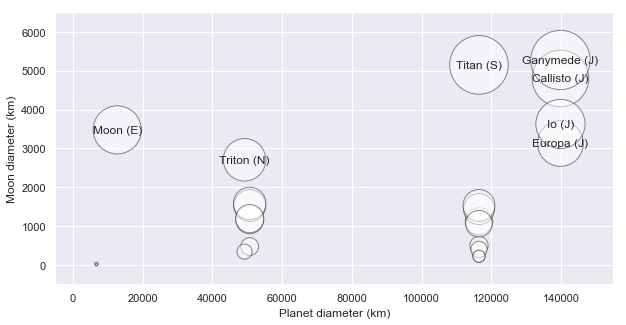

In [6]:
# B4 using Matplotlib

fig, ax = plt.subplots(figsize=(10,5))
# scatter plot with marker size proportional to moon diameter
ax.scatter(df_solar.planet_diameter_km, df_solar.moon_diameter_km, 
           s=df_solar.moon_diameter_km/1.5, facecolor='w', edgecolor='k', 
           marker='o', alpha=0.5)
# axis limits and labels
ax.set_xlim([-5000,155000])
ax.set_ylim([-500,6500])
ax.set_xlabel('Planet diameter (km)')
ax.set_ylabel('Moon diameter (km)')
# marker labels for moons larger than 2000 km
# options for markers: ax.text/plt.text, ax.annotate/plt.annotate
for index, row in df_solar.iterrows():
    if row.moon_diameter_km > 2000:
        ax.text(row.planet_diameter_km, row.moon_diameter_km, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center')
# save pdf - bbox_inches='tight' trims the margins
fig.savefig('moon_planet_diameter.pdf', bbox_inches='tight')

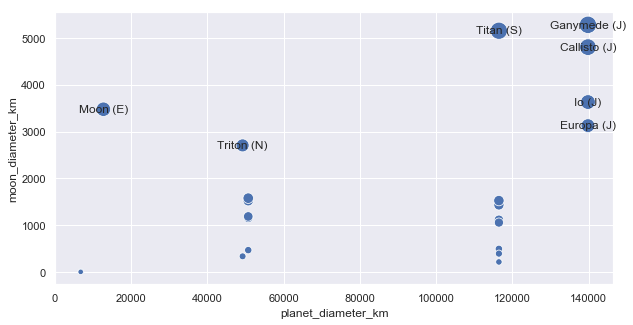

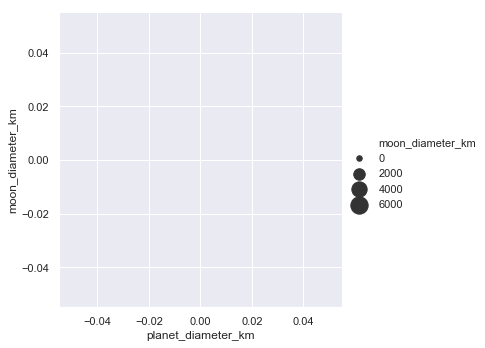

In [7]:
# B4 using Seaborn

fig, ax = plt.subplots(figsize=(10,5))
# scatter plot with marker size proportional to moon diameter
sns.relplot(x='planet_diameter_km', y='moon_diameter_km', size='moon_diameter_km', sizes=(30,300),
            data=df_solar, ax=ax)
# marker labels for moons larger than 2000 km
for index, row in df_solar.iterrows():
    if row.moon_diameter_km > 2000:
        ax.text(row.planet_diameter_km, row.moon_diameter_km, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center');
# save pdf - bbox_inches='tight' trims the margins
fig.savefig('moon_planet_diameter_sns.pdf', bbox_inches='tight')

B5. Using either Matplotlib or Seaborn, plot moon volume versus host planet volume (i.e., x-axis = `planet_volume_km3`, y-axis = `moon_volume_km3`) and label each moon next to its corresponding marker (but see B6). Save this plot as a PDF image.

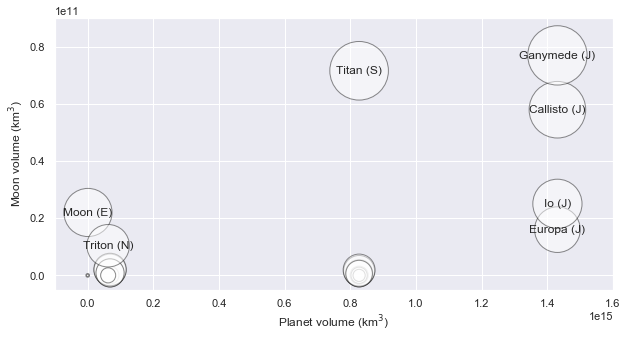

In [8]:
# B5 using Matplotlib

fig, ax = plt.subplots(figsize=(10,5))
# scatter plot with marker size proportional to moon diameter
ax.scatter(df_solar.planet_volume_km3, df_solar.moon_volume_km3, 
           s=df_solar.moon_diameter_km/1.5, facecolor='w', edgecolor='k', 
           marker='o', alpha=0.5)
# axis limits and labels
ax.set_xlim([-1e14,1.6e15])
ax.set_ylim([-5e9,9e10])
ax.set_xlabel('Planet volume (km$^3$)')
ax.set_ylabel('Moon volume (km$^3$)')
# marker labels for moons larger than 2000 km
for index, row in df_solar.iterrows():
    if row.moon_diameter_km > 2000:
        ax.text(row.planet_volume_km3, row.moon_volume_km3, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center')
# save pdf - bbox_inches='tight' trims the margins
fig.savefig('moon_planet_volume.pdf', bbox_inches='tight')

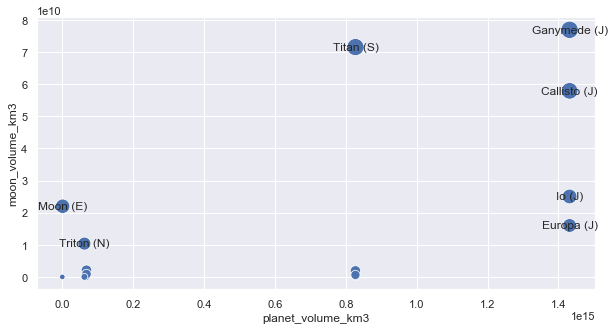

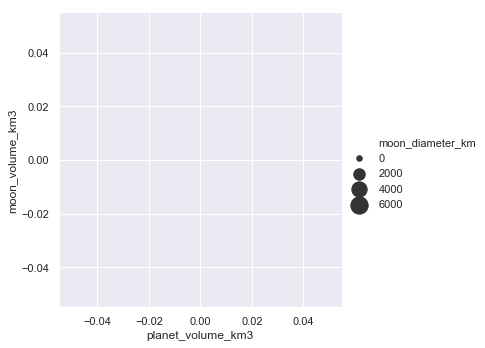

In [9]:
# B5 using Seaborn

fig, ax = plt.subplots(figsize=(10,5))
# scatter plot with marker size proportional to moon diameter
sns.relplot(x='planet_volume_km3', y='moon_volume_km3', size='moon_diameter_km', sizes=(30,300),
            data=df_solar, ax=ax)
# marker labels for moons larger than 2000 km
for index, row in df_solar.iterrows():
    if row.moon_diameter_km > 2000:
        ax.text(row.planet_volume_km3, row.moon_volume_km3, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center');
# save pdf - bbox_inches='tight' trims the margins
fig.savefig('moon_planet_volume_sns.pdf', bbox_inches='tight')

B6. Optional: Label only the moons larger than a certain size, to remove the label clutter around the smaller moons.

B7. Optional: Resize the markers so they are proportional to moon diameter.

#### C. Comparing moon and sun angular diameters

C1. Calculate the angular diameter of each moon as if you were standing on the surface of its home planet; add these to your DataFrame (suggested column name: `moon_angular_diameter_arcsec`). (Reminder: Angular diameter in arcseconds = 206265 * Diameter / Distance.)

    $\delta = 206265 \times \frac{d}{D}$

In [10]:
def angular_diameter(d, D):
    ad = 206265 * d/D
    return(ad)

In [11]:
df_solar['moon_angular_diameter_arcsec'] = angular_diameter(df_solar.moon_diameter_km, 
                                                            df_solar.moon_planet_distance_km)

C2. Calculate the angular diameter of the Sun as if you were standing on the surface of each home planet; add these to your DataFrame (suggested column name: `sun_angular_diameter_arcsec`).

In [12]:
sun_diameter = 1392684

In [13]:
df_solar['sun_angular_diameter_arcsec'] = angular_diameter(sun_diameter,
                                                           df_solar.planet_sun_distance_km)

C3. Using either Matplotlib or Seaborn, plot moon angular diameter versus Sun angular diameter for each moon (i.e., x-axis = `sun_angular_diameter_arcsec`, y-axis = `moon_angular_diameter_arcsec`) and label each moon next to its corresponding marker (but see B6). Add a line corresponding to a 1:1 ratio. Save this plot as a PDF image.

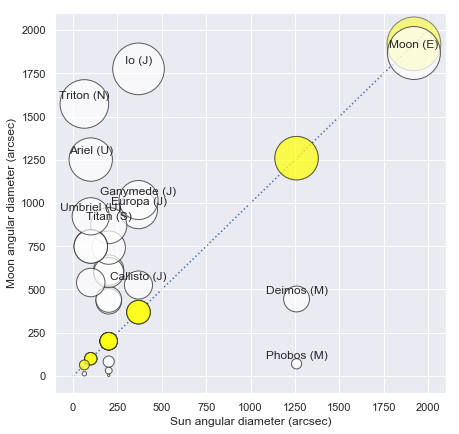

In [14]:
# C3 using Matplotlib

fig, ax = plt.subplots(figsize=(7,7))
# scatter plot of moons with marker size proportional to moon angular diameter
ax.scatter(df_solar.sun_angular_diameter_arcsec, df_solar.moon_angular_diameter_arcsec, 
           s=df_solar.moon_angular_diameter_arcsec*1.5, facecolor='w', edgecolor='k', 
           marker='o', alpha=0.7, zorder=2)
# scatter plot of suns with marker size proportional to sun angular diameter
ax.scatter(df_solar.sun_angular_diameter_arcsec, df_solar.sun_angular_diameter_arcsec, 
           s=df_solar.sun_angular_diameter_arcsec*1.5, facecolor=sns.xkcd_rgb['yellow'], 
           edgecolor='k', marker='o', alpha=0.5, zorder=1)
# x=y line representing 1:1 ratio of moon to sun angular diameter
ax.plot([0,2000], [0,2000], ':', zorder=0)
# axis limits and labels
ax.set_xlim([-100,2100])
ax.set_ylim([-100,2100])
ax.set_xlabel('Sun angular diameter (arcsec)')
ax.set_ylabel('Moon angular diameter (arcsec)')
# marker labels for moons with angular diameter > 800 arcsec or solar angular diameter > 300 arcsec
for index, row in df_solar.iterrows():
    if row.moon_angular_diameter_arcsec > 800 or row.sun_angular_diameter_arcsec > 300:
        ax.text(row.sun_angular_diameter_arcsec, row.moon_angular_diameter_arcsec+50, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center')
# save pdf - bbox_inches='tight' trims the margins
fig.savefig('moon_sun_angular_diameter.pdf', bbox_inches='tight')

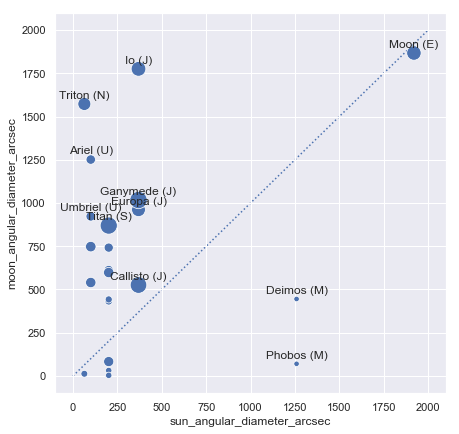

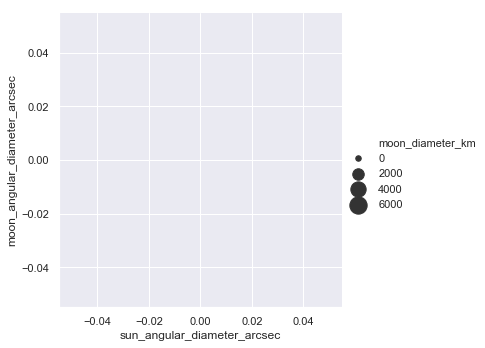

In [15]:
# C3 using Seaborn

fig, ax = plt.subplots(figsize=(7,7))
# scatter plot with marker size proportional to moon diameter
sns.relplot(x='sun_angular_diameter_arcsec', y='moon_angular_diameter_arcsec', size='moon_diameter_km', sizes=(30,300),
            data=df_solar, ax=ax)
# marker labels for moons with angular diameter > 800 arcsec or solar angular diameter > 300 arcsec
for index, row in df_solar.iterrows():
    if row.moon_angular_diameter_arcsec > 800 or row.sun_angular_diameter_arcsec > 300:
        ax.text(row.sun_angular_diameter_arcsec, row.moon_angular_diameter_arcsec+50, 
                '%s (%s)' % (row.moon_name, row.planet_name[0]), 
                ha='center', va='center')
# x=y line representing 1:1 ratio of moon to sun angular diameter
ax.plot([0,2000], [0,2000], ':', zorder=0)
# save pdf - bbox_inches='tight' trims the margins
fig.savefig('moon_sun_angular_diameter_sns.pdf', bbox_inches='tight')